# Logic Gate Modeling

With only $\leq 4$ epochs, you can converge on a good model that generalises over the logic gates.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

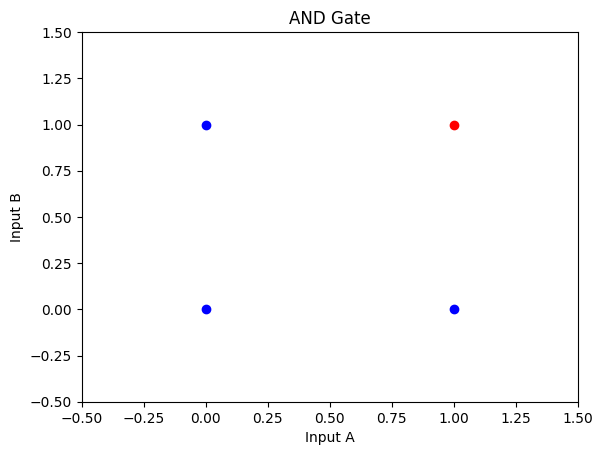

In [3]:
x_AND = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])

y_AND = np.logical_and(x_AND[:,0], x_AND[:,1]).reshape(x_AND.shape[0], -1).astype(int)

def plot_AND_gate():
    # Define inputs and outputs
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    outputs = [0, 0, 0, 1]

    # Plot the truth table
    for i in range(len(inputs)):
        plt.plot(inputs[i][0], inputs[i][1], 'ro' if outputs[i] else 'bo')
    
    plt.axis([-0.5, 1.5, -0.5, 1.5])
    plt.title('AND Gate')
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    
    # Red dots represent output=1 and blue dots represent output=0
    plt.show()

plot_AND_gate()

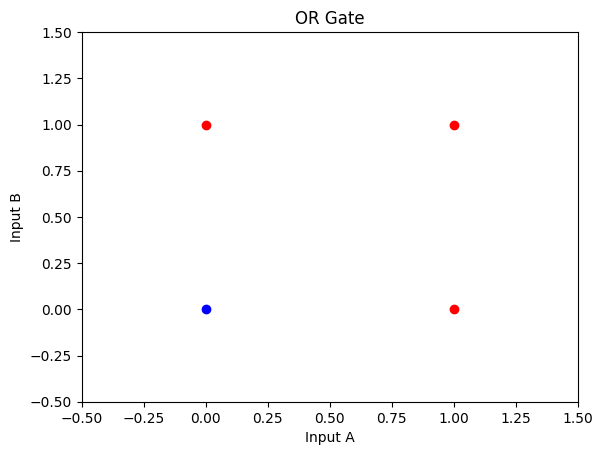

In [4]:
x_OR = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_OR = np.logical_or(x_OR[:,0], x_OR[:,1]).reshape(x_OR.shape[0], -1).astype(int)

# modelling the OR gate

def plot_OR_gate():
    # Define inputs and outputs
    inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
    outputs = [0, 1, 1, 1]

    # Plot the truth table
    for i in range(len(inputs)):
        plt.plot(inputs[i][0], inputs[i][1], 'ro' if outputs[i] else 'bo')
    
    plt.axis([-0.5, 1.5, -0.5, 1.5])
    plt.title('OR Gate')
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    
    # Red dots represent output=1 and blue dots represent output=0
    plt.show()

plot_OR_gate()


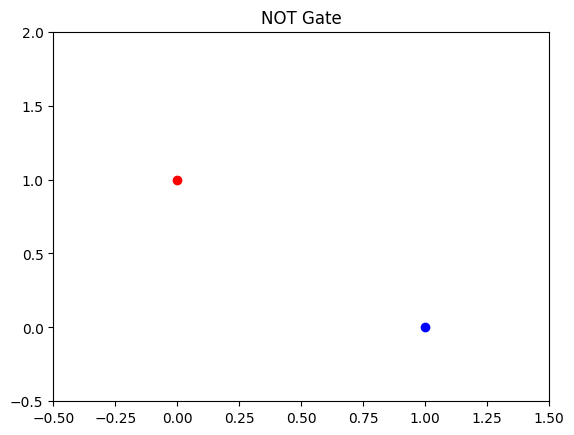

In [5]:
x_NOT = np.array([
    [0],
    [1],
])

y_NOT = np.logical_not(x_NOT).reshape(x_NOT.shape[0], -1).astype(int)

def plot_NOT_gate():
    # Define inputs and outputs
    inputs = [0, 1]
    outputs = [1, 0]

    # Plot the truth table
    for i in range(len(inputs)):
        plt.plot(inputs[i], outputs[i], 'ro' if outputs[i] else 'bo')
    
    plt.axis([-0.5, 1.5,-0.5 , 2])
    plt.title('NOT Gate')

plot_NOT_gate()


In [7]:
def sign_fn(z:np.ndarray):
    # due to rounding errors, we require that z >= 0 - eps
    return (z >= 0 - np.finfo(float).eps).reshape(z.shape).astype(int)

def perceptron(x, y, w=None, lr=0.1, iters=10, verbose=False, need_step=False):
    """Return perceptron model weights trained by Perceptron Update:  
    
    w <- w + lr * (y - sign(w * x)) * x
    
    Parameters
        x: feature array of shape `(N, D)`, where `N` is number of samples and 
            `D` is number of features. 
        y: label array of shape `(N, 1)`. 
        w: perceptron model weights of shape `(1, 1+D)`, (b, w1, w2, ..., w_D).
            Default: np.zeros([3]). 
        lr: learning rate. Default: 0.1. 
        iters: number of iterations. Default: 10. 
        verbose: whether it prints out the update process. Default: False. 
        need_step: whether it returns the update process. Default: False. 
    """
    if w is None:
        w = np.zeros([1, len(x[0]) + 1]) # + 1 for bias
    x = np.concatenate((np.ones([len(x), 1]), x), axis=1) # concat 1 for bias
    step = [w]
    for iter in range(iters):
        for i in range(len(x)):
            out = np.inner(w, x[i])
            label = sign_fn(out)

            if label != y[i]:
                w = w + lr * (y[i] - label) * x[i]
                if verbose:
                    print(f'iter = {iter}, idx = {i}, w = {w}')
                if need_step:
                    step.append(w)
    if need_step:
        return w, np.array(step).squeeze()
    else:
        return w

In [8]:
# modelling the AND gate
w = perceptron(x_AND, y_AND, verbose=True)
print (f'b = {w[:,0]}, w1 = {w[:,1]}, w2 = {w[:,2]}')

out = sign_fn(w[:,0] + w[:,1] * x_AND[:,0] + w[:,2] * x_AND[:,1])
print (f'pred = {out}, y = {y_AND.reshape(-1)}')

iter = 0, idx = 0, w = [[-0.1  0.   0. ]]
iter = 0, idx = 3, w = [[0.  0.1 0.1]]
iter = 1, idx = 0, w = [[-0.1  0.1  0.1]]
iter = 1, idx = 1, w = [[-0.2  0.1  0. ]]
iter = 1, idx = 3, w = [[-0.1  0.2  0.1]]
iter = 2, idx = 1, w = [[-0.2  0.2  0. ]]
iter = 2, idx = 2, w = [[-0.3  0.1  0. ]]
iter = 2, idx = 3, w = [[-0.2  0.2  0.1]]
iter = 3, idx = 2, w = [[-0.3  0.1  0.1]]
iter = 3, idx = 3, w = [[-0.2  0.2  0.2]]
iter = 4, idx = 1, w = [[-0.3  0.2  0.1]]
b = [-0.3], w1 = [0.2], w2 = [0.1]
pred = [0 0 0 1], y = [0 0 0 1]


In [9]:
w = perceptron(x_OR, y_OR)
print (f'b = {w[:,0]}, w1 = {w[:,1]}, w2 = {w[:,2]}')

out = sign_fn(w[:,0] + w[:,1] * x_OR[:,0] + w[:,2] * x_OR[:,1])
print (f'pred = {out}, y = {y_OR.reshape(-1)}')

b = [-0.1], w1 = [0.1], w2 = [0.1]
pred = [0 1 1 1], y = [0 1 1 1]


In [10]:
# modelling the NOT gate
w = perceptron(x_NOT, y_NOT)
print (f'b = {w[:,0]}, w1 = {w[:,1]}')

out = sign_fn(w[:,0] + w[:,1] * x_NOT[:,0])
print (f'pred = {out}, y = {y_NOT.reshape(-1)}')

b = [0.], w1 = [-0.1]
pred = [1 0], y = [1 0]


## Effect of Data Ordering

ordering = (0, 1, 2, 3), b = [-0.3], w1 = [0.2], w2 = [0.1]
ordering = (0, 1, 3, 2), b = [-0.3], w1 = [0.1], w2 = [0.2]
ordering = (0, 2, 1, 3), b = [-0.3], w1 = [0.1], w2 = [0.2]
ordering = (0, 2, 3, 1), b = [-0.3], w1 = [0.2], w2 = [0.1]


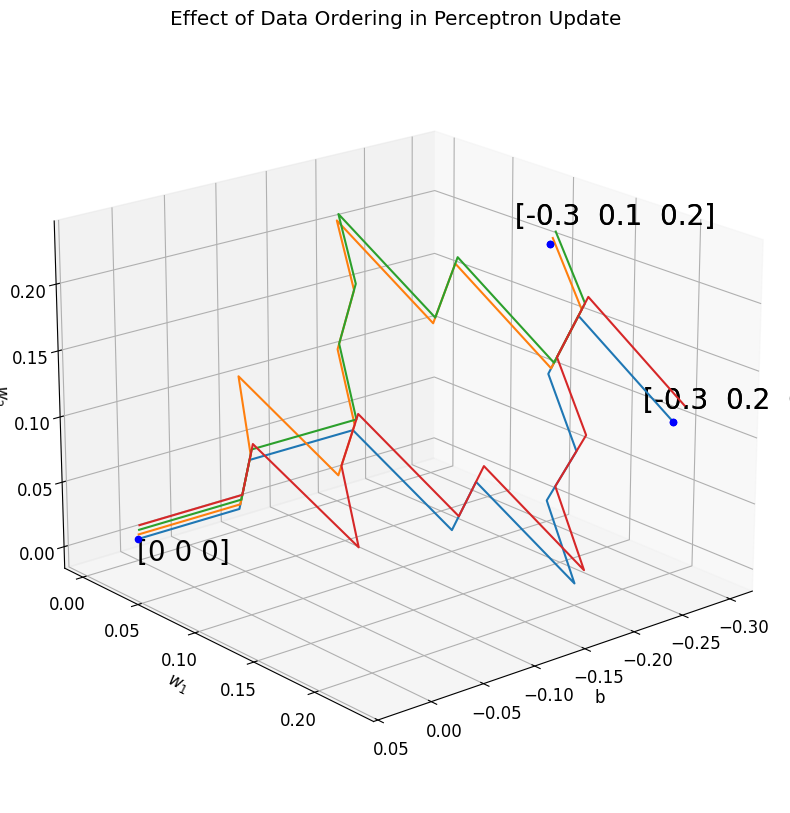

In [11]:
# modelling the AND gate
from itertools import permutations 
perm = permutations(list(range(4))) 
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
ax = plt.axes(projection='3d')
ax.view_init(20, 50)
ax.set_xlabel('b')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$w_2$')
ax.scatter(0, 0, 0, color='b') 
ax.text(-0.05, -0.05, -0.05, '[0 0 0]', size=20, zorder=1, color='k') 
ax.set_title('Effect of Data Ordering in Perceptron Update')
counter = 0
for i in list(perm):
    if counter >= 4:
        continue # show a few
    x_reorder = x_AND[i,:]
    y_reorder = np.logical_and(x_reorder[:,0], x_reorder[:,1]).reshape(x_reorder.shape[0], -1).astype(int)

    w, step = perceptron(x_reorder, y_reorder, need_step=True)
    print (f'ordering = {i}, b = {w[:,0]}, w1 = {w[:,1]}, w2 = {w[:,2]}')
    
    b_line, w1_line, w2_line = step.T + 0.01 * counter
    ax.plot3D(b_line, w1_line, w2_line)
    
    ax.scatter(w[:,0], w[:,1], w[:,2], color='b') 
    ax.text(w[0,0] + 0.1, w[0,1] + 0.05, w[0,2] + 0.05, 
        f'{w[0,:].round(1)}', size=20, zorder=1, color='k') 
    counter += 1

In [ ]:
# modelling the OR gate
from itertools import permutations 
perm = permutations(list(range(4))) 
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
ax = plt.axes(projection='3d')
ax.view_init(20, 50)
ax.set_xlabel('b')
ax.set_ylabel('$w_1$')
ax.set_zlabel('$w_2$')
ax.scatter(0, 0, 0, color='b') 
ax.text(-0.05, -0.05, -0.05, '[0 0 0]', size=20, zorder=1, color='k') 
ax.set_title('Effect of Data Ordering in Perceptron Update')
counter = 0
for i in list(perm):
    if counter >= 4:
        continue # show a few
    x_reorder = x_OR[i,:]
    y_reorder = np.logical_or(x_reorder[:,0], x_reorder[:,1]).reshape(x_reorder.shape[0], -1).astype(int)

    w, step = perceptron(x_reorder, y_reorder, need_step=True)
    print (f'ordering = {i}, b = {w[:,0]}, w1 = {w[:,1]}, w2 = {w[:,2]}')
    
    b_line, w1_line, w2_line = step.T + 0.01 * counter
    ax.plot3D(b_line, w1_line, w2_line)
    
    ax.scatter(w[:,0], w[:,1], w[:,2], color='b') 
    ax.text(w[0,0] + 0.1, w[0,1] + 0.05, w[0,2] + 0.05, 
        f'{w[0,:].round(1)}', size=20, zorder=1, color='k') 
    counter += 1

In [ ]:
# modelling the NOT gate
from itertools import permutations 
perm = permutations(list(range(2))) 
fig = plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
ax = plt.axes(projection='3d')
ax.view_init(20, 50)
ax.set_xlabel('b')
ax.set_ylabel('$w_1$')
ax.scatter(0, 0, 0, color='b') 
ax.text(-0.05, -0.05, -0.05, '[0 0 0]', size=20, zorder=1, color='k') 
ax.set_title('Effect of Data Ordering in Perceptron Update')
counter = 0
for i in list(perm):
    x_reorder = x_NOT[i, :]
    y_reorder = np.logical_not(x_reorder[:,0]).reshape(x_reorder.shape[0], -1).astype(int)

    w, step = perceptron(x_reorder, y_reorder, need_step=True)
    print (f'ordering = {i}, b = {w[:,0]}, w1 = {w[:,1]}')
    
    b_line, w1_line = step.T + 0.01 * counter
    ax.plot3D(b_line, w1_line)
    
    ax.scatter(w[:,0], w[:,1], color='b') 
    ax.text(w[0,0] + 0.1, w[0,1] + 0.05, 0, 
        f'{w[0,:].round(1)}', size=20, zorder=1, color='k') 
    counter += 1